In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

In [2]:
# load prices data to one df
prices = [pd.read_csv("./round-1-island-data-bottle/prices_round_1_day_-2.csv",sep=";"),
          pd.read_csv("./round-1-island-data-bottle/prices_round_1_day_-1.csv",sep=";"),
          pd.read_csv("./round-1-island-data-bottle/prices_round_1_day_0.csv",sep=";")]
prices = pd.concat(prices, axis = 0)
prices['timestamp_new'] = (prices['day'] + 2) * 1000000 + prices['timestamp']

# load trades data to one df
trades1 = pd.read_csv("./round-1-island-data-bottle/trades_round_1_day_-2_nn.csv",sep=";")
trades2 = pd.read_csv("./round-1-island-data-bottle/trades_round_1_day_-1_nn.csv",sep=";")
trades3 = pd.read_csv("./round-1-island-data-bottle/trades_round_1_day_0_nn.csv",sep=";")

trades1['timestamp_new'] = trades1['timestamp']
trades2['timestamp_new'] = trades2['timestamp'] + 1000000
trades3['timestamp_new'] = trades3['timestamp'] + 2000000
trades = pd.concat([trades1, trades2, trades3], axis = 0)


In [3]:
# trade summary, average price and total quantity of each symbol and each timestamp
trades['total'] = trades['price'] * trades['quantity']
trades.rename(columns={'symbol':'product'}, inplace = True)
trade_summary = trades.groupby(['timestamp_new','product']).agg({'price':'mean', 'quantity':'sum', 'total':'sum'})

In [4]:
trade_summary['vwap'] = trade_summary['total']/ trade_summary['quantity']
trade_summary.reset_index(inplace = True)


In [5]:
data = pd.merge(prices, trade_summary, on = ['timestamp_new','product'], how="left")
data[['price','quantity','total','vwap']] = data.groupby('product')[['price','quantity','total','vwap']].fillna(method='ffill')
data[['price','quantity','total','vwap']] = data.groupby('product')[['price','quantity','total','vwap']].shift()
data.set_index('timestamp_new', inplace = True)

In [6]:
data['spread'] = data['ask_price_1'] - data['bid_price_1']

# STARFRUIT

In [62]:
s = data.query("product == 'STARFRUIT'")

<Axes: xlabel='timestamp_new'>

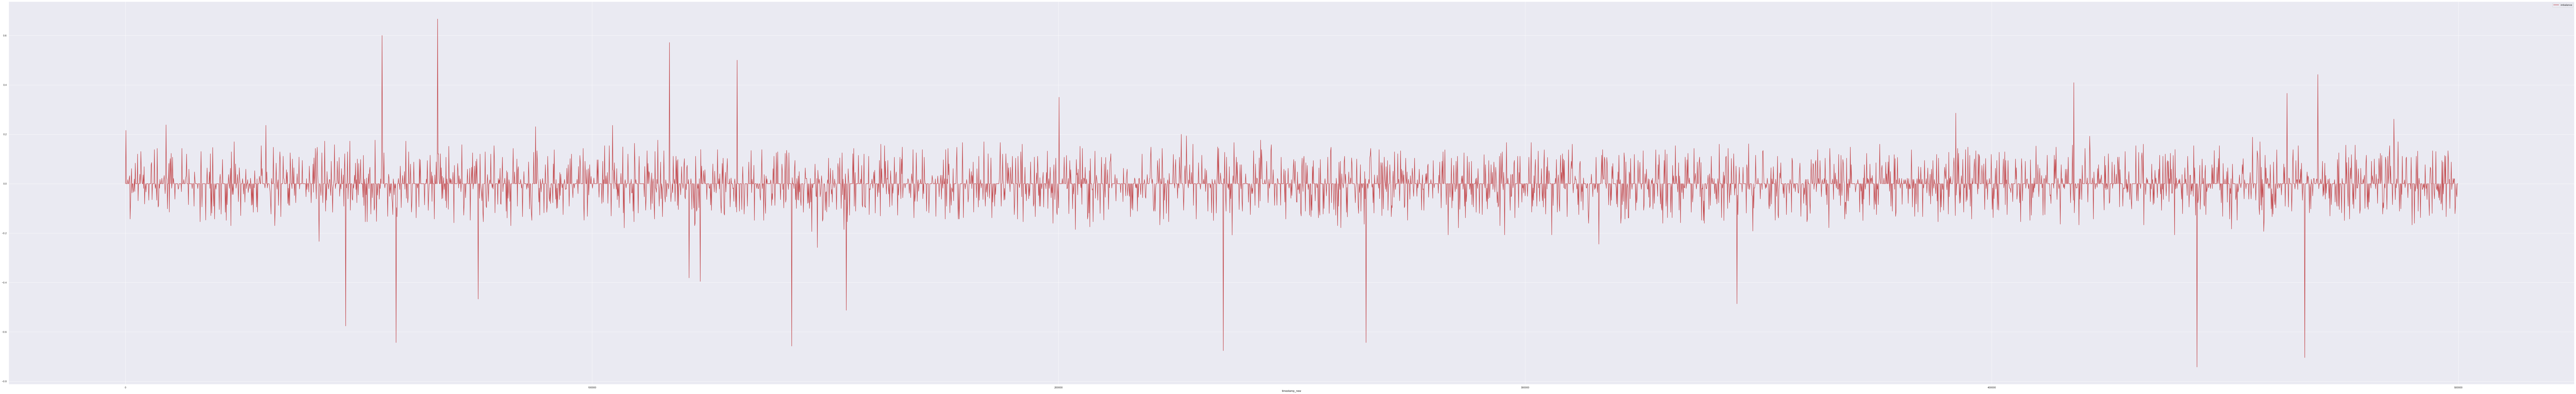

In [106]:
plt.figure(figsize=[200,30])
s['imbalance'][:5000].plot(color='r', lw=2., legend=True)

In [107]:
s[2999]

day  timestamp    product  bid_price_1  bid_volume_1  \
timestamp_new                                                         
0               -2          0  STARFRUIT         4997            26   
100             -2        100  STARFRUIT         5000             5   
200             -2        200  STARFRUIT         4997             1   
300             -2        300  STARFRUIT         4996            27   
400             -2        400  STARFRUIT         4995            20   
...            ...        ...        ...          ...           ...   
2999500          0     999500  STARFRUIT         5049            28   
2999600          0     999600  STARFRUIT         5048             9   
2999700          0     999700  STARFRUIT         5053             1   
2999800          0     999800  STARFRUIT         5047            27   
2999900          0     999900  STARFRUIT         5048             2   

               bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
timestamp_new                                                         
0                      NaN           0.0          NaN           0.0   
100                 4998.0           6.0       4997.0          20.0   
200                 4996.0          30.0          NaN           0.0   
300                    NaN           0.0          NaN           0.0   
400                    NaN           0.0          NaN           0.0   
...                    ...           ...          ...           ...   
2999500                NaN           0.0          NaN           0.0   
2999600             5047.0          27.0          NaN           0.0   
2999700             5048.0          26.0          NaN           0.0   
2999800                NaN           0.0          NaN           0.0   
2999900             5047.0          21.0          NaN           0.0   

               ask_price_1  ...  mid_price  profit_and_loss   price  quantity  \
timestamp_new               ...                                                 
0                     5003  ...     5000.0              0.0     NaN       NaN   
100                   5004  ...     5002.0              0.0  5003.0       1.0   
200                   5003  ...     5000.0              0.0  5004.0       6.0   
300                   5003  ...     4999.5              0.0  5004.0       6.0   
400                   5002  ...     4998.5              0.0  5004.0       6.0   
...                    ...  ...        ...              ...     ...       ...   
2999500               5056  ...     5052.5              0.0  5050.0       1.0   
2999600               5054  ...     5051.0              0.0  5049.0       2.0   
2999700               5054  ...     5053.5              0.0  5048.0       1.0   
2999800               5052  ...     5049.5              0.0  5048.0       1.0   
2999900               5054  ...     5051.0              0.0  5048.0       1.0   

                 total    vwap  spread  total_bid_volume  total_ask_volume  \
timestamp_new                                                                
0                  NaN     NaN       6              26.0              26.0   
100             5003.0  5003.0       4              31.0              20.0   
200            30024.0  5004.0       6              31.0              31.0   
300            30024.0  5004.0       7              27.0              27.0   
400            30024.0  5004.0       7              20.0              20.0   
...                ...     ...     ...               ...               ...   
2999500         5050.0  5050.0       7              28.0              28.0   
2999600        10098.0  5049.0       6              36.0              29.0   
2999700         5048.0  5048.0       1              27.0              26.0   
2999800         5048.0  5048.0       5              27.0              28.0   
2999900         5048.0  5048.0       6              23.0              23.0   

               imbalance  
timestamp_new             
0               0.000000  
100             0

In [136]:
signal = s['imbalance'] > 0.25
neg_signal = s['imbalance'] < -0.25

In [135]:
s['imbalance'].max()

0.7419354838709677

In [139]:
rount()

In [137]:
product = 'STARFRUIT'
endpoint= 5000
plt.figure(figsize=[200,80])
# data.query(f"product == '{product}'")['mid_price'][:endpoint].plot(color='blue', lw=2., legend=True)
plt.plot(s.query(f"product == '{product}'")['vwap'][:endpoint],color='y', lw=2.)
# s.query(f"product == '{product}'")['bid_price_1'][:endpoint].plot(color='g', lw=2., legend=True)
# data.query(f"product == '{product}'")['ask_price_1'][:endpoint].plot(color='r', lw=2., legend=True)
for i in signal[:endpoint].index:
    if signal[i]:
        plt.axvline(x=i, color='r', linestyle='--', linewidth=2)
    if neg_signal[i]:
        plt.axvline(x=i, color='g', linestyle='--', linewidth=2)
plt.show()

In [202]:
def turtle_trading(financial_data, window_size):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    signals['mid_price'] = financial_data['mid_price']
    # window_size-days high
    signals['high'] = financial_data['mid_price'].shift(1).\
    rolling(window=window_size).max()
    # window_size-days low
    signals['low'] = financial_data['mid_price'].shift(1).\
    rolling(window=window_size).min()
    # window_size-days mean
    signals['avg'] = financial_data['mid_price'].shift(1).\
    rolling(window=window_size).mean()

    # rule for the entry signal
    signals['long_entry'] = financial_data['mid_price'] > signals['high']
    signals['short_entry'] = financial_data['mid_price'] < signals['low']

    # rule for the exit signal
    signals['long_exit'] = financial_data['mid_price'] < signals['avg']
    signals['short_exit'] = financial_data['mid_price'] > signals['avg']

    # rules to determine the orders
    init=True
    position=0
    for k in range(len(signals)):
        # long signal and no position at the moment: entry a long position
        if signals['long_entry'][k] and position==0:
            signals.orders.values[k] = 1
            position=1
        # short signal and no position at the moment: entry a short position
        elif signals['short_entry'][k] and position==0:
            signals.orders.values[k] = -1
            position=-1
        # short exit signal and short position at the moment: exit the short position
        elif signals['short_exit'][k] and position < 0:
            signals.orders.values[k] = 1
            position = 0
        # long exit signal and long position at the moment: exit the long position
        elif signals['long_exit'][k] and position > 0:
            signals.orders.values[k] = -1
            position = 0
        else:
            # no signal needed
            signals.orders.values[k] = 0
    return signals


In [213]:
ts=turtle_trading(a[:endpoint].reset_index(drop = True), 20)

In [214]:
fig = plt.figure(figsize=[200,80])
ax1 = fig.add_subplot(111, ylabel='Google price in $')
a[:endpoint].reset_index(drop = True)["mid_price"].plot(ax=ax1, color='b', lw=.5)
#ts["low"].plot(ax=ax1, color='r', lw=2.)
#ts["high"].plot(ax=ax1, color='g', lw=2.)
#ts["avg"].plot(ax=ax1, color='yellow', lw=2.)
ax1.plot(ts.loc[ts.orders== 1.0].index,
a[:endpoint].reset_index(drop = True)["mid_price"][ts.orders == 1],'^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
a[:endpoint].reset_index(drop = True)["mid_price"][ts.orders == -1],'v', markersize=7, color='k')
plt.legend(["Price","low","high"])
plt.title("Turtle Trading Strategy")
plt.show()

## order pressure based on bid-ask volume
1. calculate the total volume of bid and ask
2. calculate the imblance 
3. long/ short term momentum

In [ ]:
def strategy(tick_data, order_book):
    # Calculate order book imbalance
    total_bid_volume = sum([level.volume for level in order_book.bids[:3]])
    total_ask_volume = sum([level.volume for level in order_book.asks[:3]])
    imbalance = (total_bid_volume - total_ask_volume) / (total_bid_volume + total_ask_volume)
    
    # Calculate price momentum
    short_term_momentum = calculate_momentum(tick_data, window=5)
    long_term_momentum = calculate_momentum(tick_data, window=10)
    
    # Generate signals
    if imbalance > 0.2 and short_term_momentum > long_term_momentum:
        return 'Buy'
    elif imbalance < -0.2 and short_term_momentum < long_term_momentum:
        return 'Sell'
    else:
        return 'Hold'

In [70]:
s.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss', 'price',
       'quantity', 'total', 'vwap', 'spread'],
      dtype='object')

In [71]:
s[['bid_volume_1','bid_volume_2','bid_volume_3','ask_volume_1','ask_volume_2','ask_volume_3']] = s[['bid_volume_1','bid_volume_2','bid_volume_3','ask_volume_1','ask_volume_2','ask_volume_3']].fillna(0)

/var/folders/cb/3xpyndm50zq34mbkkt98j8l00000gq/T/ipykernel_56321/1538797013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s[['bid_volume_1','bid_volume_2','bid_volume_3','ask_volume_1','ask_volume_2','ask_volume_3']] = s[['bid_volume_1','bid_volume_2','bid_volume_3','ask_volume_1','ask_volume_2','ask_volume_3']].fillna(0)


In [75]:
s[['bid_volume_1','bid_volume_2','bid_volume_3']].sum(axis = 1)

timestamp_new
0          26.0
100        31.0
200        31.0
300        27.0
400        20.0
           ... 
2999500    28.0
2999600    36.0
2999700    27.0
2999800    27.0
2999900    23.0
Length: 30000, dtype: float64

In [76]:
s['total_bid_volume'] = s[['bid_volume_1','bid_volume_2','bid_volume_3']].sum(axis = 1)
s['total_ask_volume'] = s[['ask_volume_1','ask_volume_2','ask_volume_3']].sum(axis = 1)

/var/folders/cb/3xpyndm50zq34mbkkt98j8l00000gq/T/ipykernel_56321/3168289848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['total_bid_volume'] = s[['bid_volume_1','bid_volume_2','bid_volume_3']].sum(axis = 1)
/var/folders/cb/3xpyndm50zq34mbkkt98j8l00000gq/T/ipykernel_56321/3168289848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['total_ask_volume'] = s[['ask_volume_1','ask_volume_2','ask_volume_3']].sum(axis = 1)


In [86]:
s['imbalance'] = (s['total_bid_volume'] - s['total_ask_volume']) / (s['total_bid_volume'] + s['total_ask_volume'])

/var/folders/cb/3xpyndm50zq34mbkkt98j8l00000gq/T/ipykernel_56321/3444722020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['imbalance'] = (s['total_bid_volume'] - s['total_ask_volume']) / (s['total_bid_volume'] + s['total_ask_volume'])


In [91]:
import seaborn as sns
sns.set()


In [102]:
s['imbalance'].mean() + s['imbalance'].std()*1.96

0.13018294906822028

<Axes: xlabel='imbalance', ylabel='Density'>

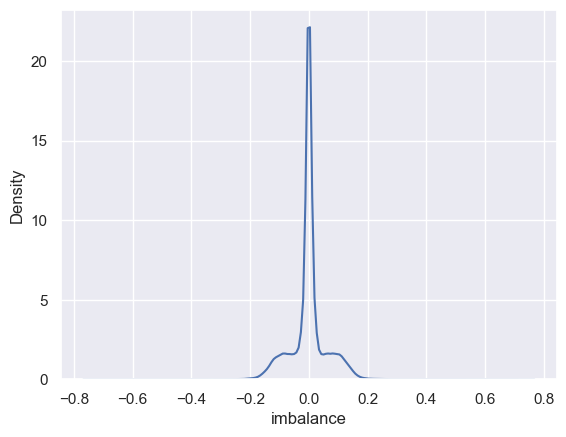

In [97]:
sns.kdeplot(s['imbalance'])

In [90]:
s['imbalance']

-0.7419354838709677

In [81]:
s.bid_price_1.isna().sum()

0

# AMETHYSTS

In [11]:
a = data.query("product == 'AMETHYSTS'")

In [52]:
a.query("ask_price_1 == 9998")

day  timestamp    product  bid_price_1  bid_volume_1  \
timestamp_new                                                         
400             -2        400  AMETHYSTS         9995            20   
1400            -2       1400  AMETHYSTS         9995            26   
2500            -2       2500  AMETHYSTS         9995            21   
8500            -2       8500  AMETHYSTS         9996             1   
12800           -2      12800  AMETHYSTS         9995            20   
...            ...        ...        ...          ...           ...   
2996600          0     996600  AMETHYSTS         9996             2   
2996900          0     996900  AMETHYSTS         9996             2   
2997400          0     997400  AMETHYSTS         9996             1   
2997700          0     997700  AMETHYSTS         9996             1   
2998200          0     998200  AMETHYSTS         9996             1   

               bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
timestamp_new                                                         
400                    NaN           NaN          NaN           NaN   
1400                   NaN           NaN          NaN           NaN   
2500                   NaN           NaN          NaN           NaN   
8500                9995.0          23.0          NaN           NaN   
12800                  NaN           NaN          NaN           NaN   
...                    ...           ...          ...           ...   
2996600             9995.0          22.0          NaN           NaN   
2996900             9995.0          28.0          NaN           NaN   
2997400             9995.0          22.0          NaN           NaN   
2997700             9995.0          24.0          NaN           NaN   
2998200             9995.0          23.0          NaN           NaN   

               ask_price_1  ...  ask_volume_2  ask_price_3  ask_volume_3  \
timestamp_new               ...                                            
400                   9998  ...           9.0      10005.0          20.0   
1400                  9998  ...          26.0          NaN           NaN   
2500                  9998  ...          21.0          NaN           NaN   
8500                  9998  ...           1.0      10005.0          23.0   
12800                 9998  ...          10.0      10005.0          20.0   
...                    ...  ...           ...          ...           ...   
2996600               9998  ...           8.0      10004.0           2.0   
2996900               9998  ...           2.0      10005.0          28.0   
2997400               9998  ...           1.0      10005.0          22.0   
2997700               9998  ...           1.0      10005.0          24.0   
2998200               9998  ...           1.0      10005.0          23.0   

               mid_price  profit_and_loss    price  quantity    total  \
timestamp_new                                                           
400               9996.5              0.0   9996.0       2.0  19992.0   
1400              9996.5              0.0   9996.0       2.0  19992.0   
2500              9996.5              0.0  10004.0       1.0  10004.0   
8500              9997.0              0.0  10002.0       1.0  10002.0   
12800             9996.5              0.0  10005.0       2.0  20010.0   
...                  ...              ...      ...       ...      ...   
2996600           9997.0              0.0  10004.0       3.0  30012.0   
2996900           9997.0              0.0  10005.0       2.0  20010.0   
2997400           9997.0              0.0   9996.0       1.0   9996.0   
2997700           9997.0              0.0  10002.0       4.0  40008.0   
2998200           9997.0              0.0  10002.0       1.0  10002.0   

                  vwap  spread  
timestamp_new                   
400             9996.0       3  
1400            9996.0       3  
2500           10004.0       3  
8500           10002.0       2  
12800          10005.0       3

In [32]:
a.mid_price.mean()

9999.99655

In [45]:
a.bid_price_1.max()

10002

In [44]:
a.ask_price_1.max()

10005

In [53]:
a

day  timestamp    product  bid_price_1  bid_volume_1  \
timestamp_new                                                         
0               -2          0  AMETHYSTS         9996             1   
100             -2        100  AMETHYSTS        10000             5   
200             -2        200  AMETHYSTS         9996             1   
300             -2        300  AMETHYSTS         9996             1   
400             -2        400  AMETHYSTS         9995            20   
...            ...        ...        ...          ...           ...   
2999500          0     999500  AMETHYSTS         9995            28   
2999600          0     999600  AMETHYSTS         9996             2   
2999700          0     999700  AMETHYSTS         9996             2   
2999800          0     999800  AMETHYSTS         9995            27   
2999900          0     999900  AMETHYSTS         9996             2   

               bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
timestamp_new                                                         
0                   9995.0          25.0          NaN           NaN   
100                 9995.0          20.0          NaN           NaN   
200                 9995.0          30.0          NaN           NaN   
300                 9995.0          26.0          NaN           NaN   
400                    NaN           NaN          NaN           NaN   
...                    ...           ...          ...           ...   
2999500                NaN           NaN          NaN           NaN   
2999600             9995.0          27.0          NaN           NaN   
2999700             9995.0          24.0          NaN           NaN   
2999800                NaN           NaN          NaN           NaN   
2999900             9995.0          21.0          NaN           NaN   

               ask_price_1  ...  ask_volume_2  ask_price_3  ask_volume_3  \
timestamp_new               ...                                            
0                    10004  ...          25.0          NaN           NaN   
100                  10005  ...           NaN          NaN           NaN   
200                  10004  ...          30.0          NaN           NaN   
300                  10004  ...          26.0          NaN           NaN   
400                   9998  ...           9.0      10005.0          20.0   
...                    ...  ...           ...          ...           ...   
2999500              10002  ...          28.0          NaN           NaN   
2999600              10002  ...           2.0      10005.0          27.0   
2999700              10004  ...          24.0          NaN           NaN   
2999800              10005  ...           NaN          NaN           NaN   
2999900              10004  ...          21.0          NaN           NaN   

               mid_price  profit_and_loss    price  quantity    total  \
timestamp_new                                                           
0                10000.0              0.0      NaN       NaN      NaN   
100              10002.5              0.0   9996.0       2.0  19992.0   
200              10000.0              0.0   9996.0       2.0  19992.0   
300              10000.0              0.0   9996.0       2.0  19992.0   
400               9996.5              0.0   9996.0       2.0  19992.0   
...                  ...              ...      ...       ...      ...   
2999500           9998.5              0.0  10002.0       1.0  10002.0   
2999600           9999.0              0.0   9995.0       2.0  19990.0   
2999700          10000.0              0.0   9995.0       2.0  19990.0   
2999800          10000.0              0.0   9995.0       2.0  19990.0   
2999900          10000.0              0.0   9995.0       2.0  19990.0   

                  vwap  spread  
timestamp_new                   
0                  NaN       8  
100             9996.0       5  
200             9996.0       8  
300             9996.0       8  
400             9996.0       3

In [ ]:
9998
10002

In [54]:
buy_orders = {1:2, 5:6, 8:9}

In [59]:
sum([a[1] for a in buy_orders.items()])

17

In [60]:
q = dict()

In [61]:
sum([a[1] for a in q.items()])

0

In [85]:
7/4

1.75